<a href="https://colab.research.google.com/github/Adekoyaag/Adekoyaag/blob/main/Copy_of_Updated_RFM%26Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import Online Retail Data containing transactions from 01/12/2010 and 09/12/2011
Bank_data = pd.read_csv('/content/Anonymous_data.csv', encoding = 'unicode_escape')
Bank_data.head()

,RECID,ACCOUNT_NUMBER,AMOUNT_LCY,CUSTOMER_ID,ACCOUNT_OFFICER,VALUE_DATE,BOOKING_DATE,BOOKING_DATE_YMD,PROCESSING_DATE,DEB_CRE_IND,AMOUNT_LCY_SIGN,AMOUNT_FCY_SIGN,OPENINGDATE,DATE_LAST_CR_CUST,seqnum
0,S!NGN1280020172001!CR!NGN!TT!183!20220406!2022...,NGN1280020172001,500053.75,NaN,1,00:00.0,00:00.0,20220406,00:00.0,C,500053.75,0.0,5/2/2016,5/26/2016,901
1,1.9875E+14,0057267493,0.90,10000007.0,777,00:00.0,00:00.0,20220531,00:00.0,C,0.90,0.0,6/9/2016,6/15/2016,1
2,1.98706E+14,0076780146,30000.00,10009141.0,500696,00:00.0,00:00.0,20220526,00:00.0,C,30000.00,0.0,3/25/2020,8/10/2022,69
3,1.98156E+14,0087555265,93000.00,10000166.0,500930,00:00.0,00:00.0,20220401,00:00.0,C,93000.00,0.0,2/18/2022,7/14/2022,1
4,1.97564E+14,0057262780,0.11,10000023.0,1111,00:00.0,00:00.0,20220131,00:00.0,C,0.11,0.0,6/9/2016,6/21/2016,1


In [ ]:
#Check the shape (number of columns and rows) in the dataset
Bank_data.shape

(94451, 15)

In [ ]:
#Customer distribution by Account officers
country_cust_data=Bank_data[['ACCOUNT_OFFICER','CUSTOMER_ID']].drop_duplicates()
country_cust_data.groupby(['ACCOUNT_OFFICER'])['CUSTOMER_ID'].aggregate('count').reset_index().sort_values('CUSTOMER_ID', ascending=False)

,ACCOUNT_OFFICER,CUSTOMER_ID
8,1111.0,3382
7,999.0,320
6,777.0,255
5,555.0,243
0,1.0,218
...,...,...
1072,506987.0,0
1442,509250.0,0
1203,508286.0,0
582,502908.0,0


In [ ]:
#Customer distribution by Account officers
country_cust_data=Bank_data[['ACCOUNT_OFFICER','CUSTOMER_ID','RECID']].drop_duplicates()
country_cust_data.groupby(['ACCOUNT_OFFICER'])['CUSTOMER_ID','RECID'].aggregate('count').reset_index().sort_values('CUSTOMER_ID', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,ACCOUNT_OFFICER,CUSTOMER_ID,RECID
8,1111.0,19889,19889
0,1.0,1695,2769
9,3003.0,1543,1543
5,555.0,1483,1497
7,999.0,1461,1475
...,...,...,...
719,504929.0,0,4
715,504635.0,0,1
711,504505.0,0,1
1749,511173.0,0,1


In [ ]:
#df_new_ = Bank_data[Bank_data.ACCOUNT_OFFICER.isin([777,555,999,1111])]



In [ ]:
df_new_ = Bank_data

In [ ]:
#Check for missing values in the dataset
df_new_.isnull().sum(axis=0)

RECID                   0
ACCOUNT_NUMBER          0
AMOUNT_LCY              0
CUSTOMER_ID          3334
ACCOUNT_OFFICER         0
VALUE_DATE              0
BOOKING_DATE            0
BOOKING_DATE_YMD        0
PROCESSING_DATE         0
DEB_CRE_IND             0
AMOUNT_LCY_SIGN         0
AMOUNT_FCY_SIGN         0
OPENINGDATE             0
DATE_LAST_CR_CUST    4609
seqnum                  0
dtype: int64

In [ ]:
#Remove missing values from CustomerID column, can ignore missing values in description column
df_new1 = df_new_[pd.notnull(df_new_['CUSTOMER_ID'])]



In [ ]:
df_new2 = df_new1[pd.notnull(df_new1['DATE_LAST_CR_CUST'])]

In [ ]:
df_new = df_new2[pd.notnull(df_new1['seqnum'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
#Check for missing values in the dataset
df_new.isnull().sum(axis=0)

RECID                0
ACCOUNT_NUMBER       0
AMOUNT_LCY           0
CUSTOMER_ID          0
ACCOUNT_OFFICER      0
VALUE_DATE           0
BOOKING_DATE         0
BOOKING_DATE_YMD     0
PROCESSING_DATE      0
DEB_CRE_IND          0
AMOUNT_LCY_SIGN      0
AMOUNT_FCY_SIGN      0
OPENINGDATE          0
DATE_LAST_CR_CUST    0
seqnum               0
dtype: int64

In [ ]:
#Validate if there are any negative values in TransactionID
df_new.RECID.min()

'1.97241E+14'

In [ ]:
#Validate if there are any negative values in TransactionID
df_new.AMOUNT_LCY.min()

0.01

In [ ]:
df_new.shape

(192084, 15)

In [ ]:
df_new.head()

,RECID,ACCOUNT_NUMBER,AMOUNT_LCY,CUSTOMER_ID,ACCOUNT_OFFICER,VALUE_DATE,BOOKING_DATE,BOOKING_DATE_YMD,PROCESSING_DATE,DEB_CRE_IND,AMOUNT_LCY_SIGN,AMOUNT_FCY_SIGN,OPENINGDATE,DATE_LAST_CR_CUST,seqnum
1,1.9875E+14,0057267493,0.90,10000007.0,777,00:00.0,00:00.0,20220531,00:00.0,C,0.90,0.0,6/9/2016,6/15/2016,1
2,1.98706E+14,0076780146,30000.00,10009141.0,500696,00:00.0,00:00.0,20220526,00:00.0,C,30000.00,0.0,3/25/2020,8/10/2022,69
3,1.98156E+14,0087555265,93000.00,10000166.0,500930,00:00.0,00:00.0,20220401,00:00.0,C,93000.00,0.0,2/18/2022,7/14/2022,1
4,1.97564E+14,0057262780,0.11,10000023.0,1111,00:00.0,00:00.0,20220131,00:00.0,C,0.11,0.0,6/9/2016,6/21/2016,1
5,1.98132E+14,0057264368,31564.29,10000177.0,1111,00:00.0,00:00.0,20220330,00:00.0,C,31564.29,0.0,6/9/2016,8/1/2022,1


**Convert Booking date to Date Only**

In [ ]:
df_new['BOOKING_DATE'] = pd.to_datetime(df_new['BOOKING_DATE'])

**Convert Last Date Account was credited to Date Only**

In [ ]:
df_new['DATE_LAST_CR_CUST'] = pd.to_datetime(df_new['DATE_LAST_CR_CUST'])

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
#Latest_Date = dt.datetime(2022,8,11)

In [ ]:
df_recency = df_new.groupby(by='CUSTOMER_ID',
                        as_index=False)['DATE_LAST_CR_CUST'].max()

In [ ]:
import datetime as dt
Latest_Date = dt.datetime(2022,8,12)
df_recency.columns = ['CUSTOMER_ID', 'DATE_LAST_CR_CUST']

In [ ]:
df_recency['Recency'] = df_recency['DATE_LAST_CR_CUST'].apply(
    lambda x: (Latest_Date - x).days)

**Calculate Customer's recency**

In [ ]:
df_recency.head()

,CUSTOMER_ID,DATE_LAST_CR_CUST,Recency
0,10001.0,2022-08-10,2
1,10011.0,2022-08-10,2
2,100000.0,2013-05-07,3384
3,100002.0,2020-06-18,785
4,100004.0,2013-06-03,3357


**Calculate customers Frequency**

In [ ]:
frequency_df = df_new.drop_duplicates().groupby(
    by=['CUSTOMER_ID'], as_index=False)['RECID'].count()
frequency_df.columns = ['CUSTOMER_ID', 'Frequency']
frequency_df.head()

,CUSTOMER_ID,Frequency
0,10001.0,2067
1,10011.0,1369
2,100000.0,5
3,100002.0,5
4,100004.0,5


**Calculate Monetary value for Customers**

In [ ]:

monetary_df = df_new.groupby(by='CUSTOMER_ID', as_index=False)['AMOUNT_LCY'].sum()
monetary_df.columns = ['CUSTOMER_ID', 'Monetary']
monetary_df.head()


,CUSTOMER_ID,Monetary
0,10001.0,1.181410e+12
1,10011.0,2.915409e+11
2,100000.0,3.529000e+01
3,100002.0,5.770000e+00
4,100004.0,7.540000e+00


In [ ]:
rf_df = df_recency.merge(frequency_df, on='CUSTOMER_ID')
rfm_df = rf_df.merge(monetary_df, on='CUSTOMER_ID').drop(
	columns='DATE_LAST_CR_CUST')
rfm_df.head()


,CUSTOMER_ID,Recency,Frequency,Monetary
0,10001.0,2,2067,1.181410e+12
1,10011.0,2,1369,2.915409e+11
2,100000.0,3384,5,3.529000e+01
3,100002.0,785,5,5.770000e+00
4,100004.0,3357,5,7.540000e+00


In [ ]:
rfm_df.shape

(16055, 4)

Ranking Customer’s based upon their recency, frequency, and monetary score
Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()


,CUSTOMER_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,10001.0,2,2067,1.181410e+12,98.092796,99.993771,99.993771
1,10011.0,2,1369,2.915409e+11,98.092796,99.981314,99.981314
2,100000.0,3384,5,3.529000e+01,0.318909,42.292121,42.292121
3,100002.0,785,5,5.770000e+00,67.271136,42.292121,42.292121
4,100004.0,3357,5,7.540000e+00,0.325163,42.292121,42.292121


Calculating RFM score
RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
	rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CUSTOMER_ID', 'RFM_Score']].head(7)


,CUSTOMER_ID,RFM_Score
0,10001.0,4.99
1,10011.0,4.98
2,100000.0,1.80
3,100002.0,2.30
4,100004.0,1.80
5,100006.0,1.80
6,100007.0,1.80


Rating Customer based upon the RFM score
rfm score >4.5 : Top Customer
4.5 > rfm score > 4 : High Value Customer
4>rfm score >3 : Medium value customer
3>rfm score>1.6 : Low-value customer
rfm score < 1.6 : very low- Inactive Customer

In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
									4.5, "Top Depositing Customers",
									(np.where(
										rfm_df['RFM_Score'] > 4,
										"High Depositing Customer",
										(np.where(
	rfm_df['RFM_Score'] > 3,
							"Medium Depositing Customer",
							np.where(rfm_df['RFM_Score'] > 1.6,
							'Low Depositing Customers', 'Not Depositing Customers'))))))
rfm_df[['CUSTOMER_ID', 'RFM_Score', 'Customer_segment']].head(20)


,CUSTOMER_ID,RFM_Score,Customer_segment
0,10001.0,4.99,Top Depositing Customers
1,10011.0,4.98,Top Depositing Customers
2,100000.0,1.80,Low Depositing Customers
3,100002.0,2.30,Low Depositing Customers
4,100004.0,1.80,Low Depositing Customers
5,100006.0,1.80,Low Depositing Customers
6,100007.0,1.80,Low Depositing Customers
7,100008.0,0.75,Not Depositing Customers
8,100009.0,2.31,Low Depositing Customers
9,100010.0,2.32,Low Depositing Customers


** Visualizing the customer segments
Here we will use a pie plot to display all segments of customers. **

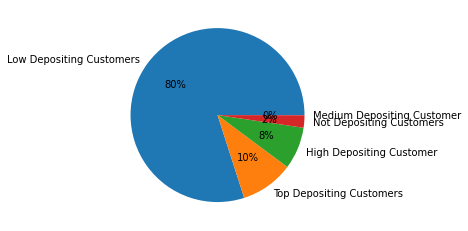

In [ ]:
plt.pie(rfm_df.Customer_segment.value_counts(),
		labels=rfm_df.Customer_segment.value_counts().index,
		autopct='%.0f%%')
plt.show()
